In [1]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

In [4]:
## Import and read data, dropping unused columns. Create pandas frame.
df = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_chl0717-0618.csv', 
                 parse_dates=[[0,1]], index_col=0)
df = df.drop(columns=['turbidity_units', 'threshold', 'const_err'])
df = df[df.chlorophyll_concentration > -0.3]

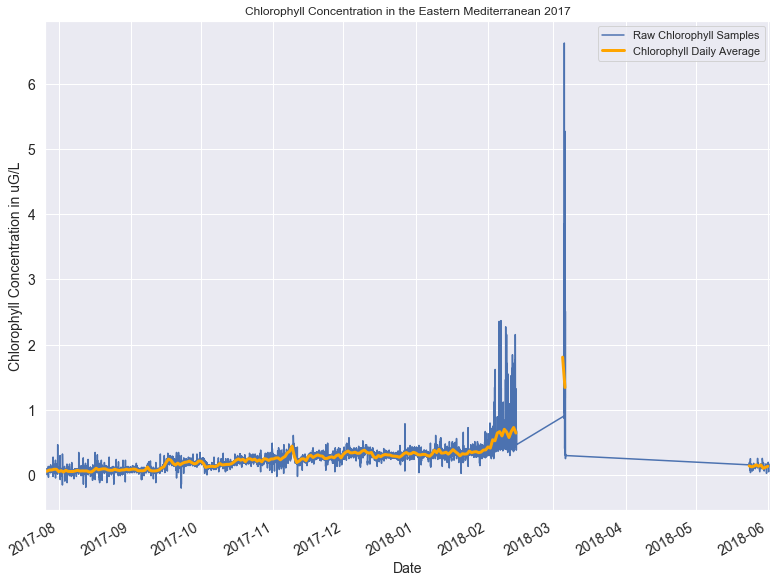

In [11]:
## Create time series that includes an average line, reveals missing data

avg = df.chlorophyll_concentration.resample('D').mean()
plot = df.plot(title="Chlorophyll Concentration in the Eastern Mediterranean 2017", 
               figsize=(13,10), fontsize=14)
avg.plot(linewidth=3, color='orange')
plot.set_xlabel("Date", fontsize=14), plot.set_ylabel("Chlorophyll Concentration in uG/L", 
               fontsize=14)
plot.legend(['Raw Chlorophyll Samples', 'Chlorophyll Daily Average'])

In [12]:
## Data disappears after 2018-02-13, briefly appears on 2018-03-05/06,
## disappears again until 2018-05-24. After the original data break, the sampling
## also becomes far less frequent per day. 
## During high frequency times, sampling is ~ 40-50 a day.
## After data break, it's closer to 10.

day_1 = df['2017-07-26'] #len(day_1) = 48
day_2 = df['2018-05-29'] #len(day_2) = 6

In [13]:
## Create new data frame that ends on 2018-02-13.
data = df[:'2018-02-13']

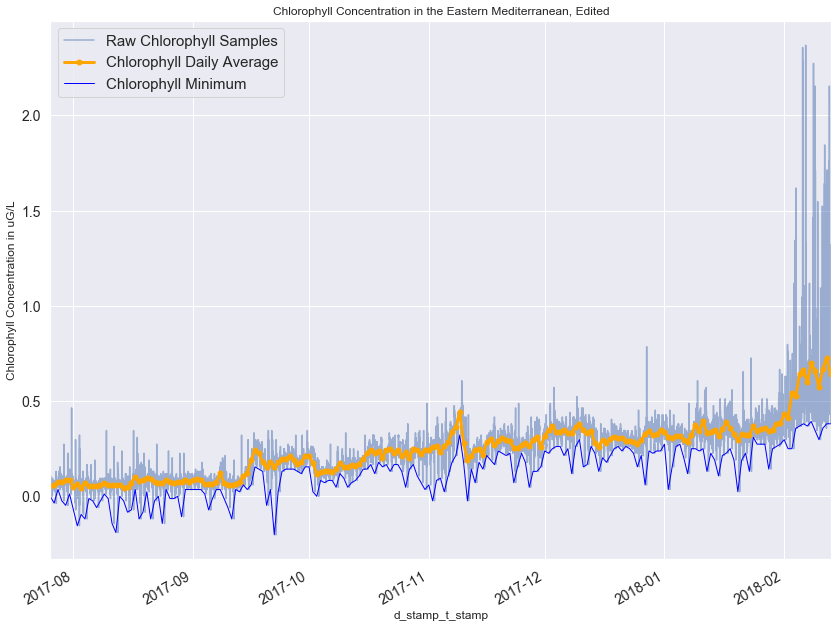

In [14]:
## Replot using the new data frame.
avg2 = data.chlorophyll_concentration.resample('D').mean()
plot2 = data.plot(title="Chlorophyll Concentration in the Eastern Mediterranean, Edited", 
                 figsize=(14,11), fontsize=14, alpha=0.5)
plot2.set_xlabel("Date"),plot2.set_ylabel("Chlorophyll Concentration in uG/L")
avg2.plot(linewidth=3, legend=True, color='orange', marker='o', markersize=5)
plotmin = data.chlorophyll_concentration.resample('D').min()
plotmin.plot(linewidth=1, color='blue')
plot2.legend(["Raw Chlorophyll Samples", "Chlorophyll Daily Average", 
              "Chlorophyll Minimum"], fontsize=15)

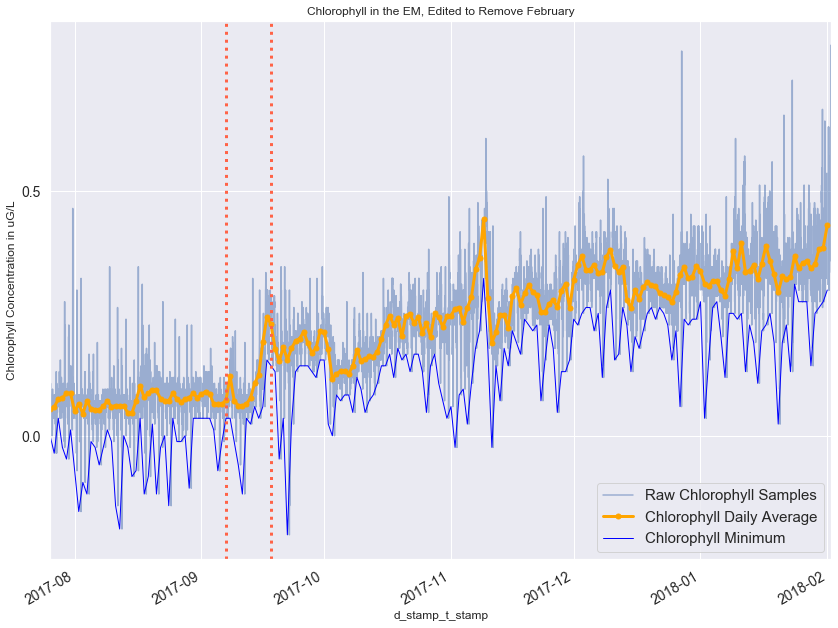

In [15]:
## Without February to increase vertical resolution
nofeb = data[:'2018-02-01']
nofebplot = nofeb.plot(title="Chlorophyll in the EM, Edited to Remove February", 
                       figsize=(14,11), fontsize=14, alpha=0.5)
nofebplot.set_xlabel("Date"),nofebplot.set_ylabel("Chlorophyll Concentration in uG/L")
nofebavg = nofeb.chlorophyll_concentration.resample('D').mean()
nofebavg.plot(linewidth=3, color='orange', marker='o', markersize=5)
nofebmin = nofeb.chlorophyll_concentration.resample('D').min()
nofebmin.plot(linewidth=1, color='blue')
nofebplot.legend(["Raw Chlorophyll Samples", "Chlorophyll Daily Average", 
                  "Chlorophyll Minimum"], fontsize=15)
plt.yticks(np.arange(0, 1.0, 0.5))
nofebplot.axvline('2017-09-07', color='tomato', linestyle=':', linewidth=3)
nofebplot.axvline('2017-09-18', color='tomato', linestyle=':', linewidth=3)

([<matplotlib.axis.YTick at 0x1a1f0b35c0>,
 <a list of 5 Text yticklabel objects>)

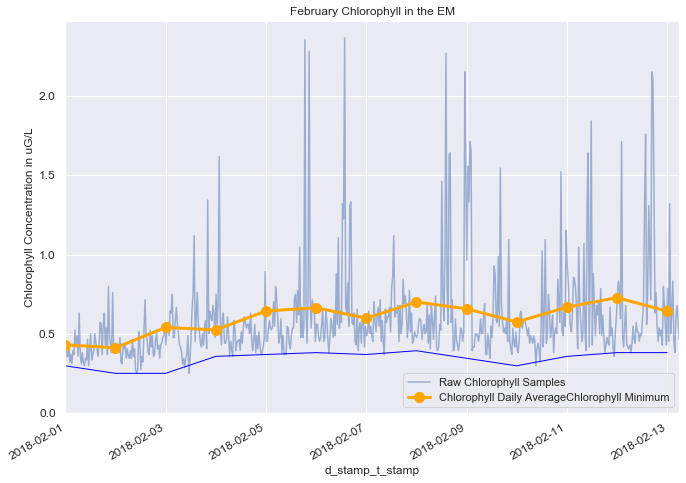

In [16]:
## February graph
february = data['2018-02-01':]
febplot = february.plot(title="February Chlorophyll in the EM", figsize=(11,8), 
                        fontsize=12, alpha=0.5)
febplot.set_xlabel("Date"),febplot.set_ylabel("Chlorophyll Concentration in uG/L")
febavg = february.chlorophyll_concentration.resample('D').mean()
febavg.plot(linewidth=3, color='orange', marker='o', markersize=10)
febmin = february.chlorophyll_concentration.resample('D').min()
febmin.plot(linewidth=1, color='blue')
febplot.legend(["Raw Chlorophyll Samples", "Chlorophyll Daily Average"
                "Chlorophyll Minimum"])
plt.yticks(np.arange(0, 2.5, 0.5))

(None,
 ([<matplotlib.axis.XTick at 0x1a1ed5e1d0>,
  <a list of 11 Text xticklabel objects>))

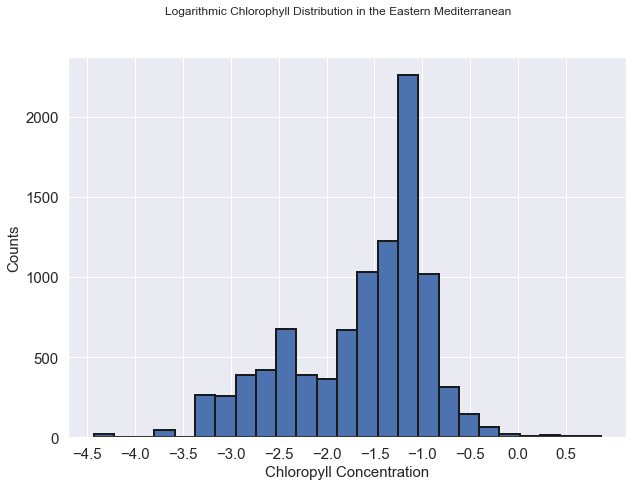

In [17]:
## Log transformation histogram of chlorophyll, includes February
chlpos = data[data.chlorophyll_concentration > 0]
log = np.log(chlpos.chlorophyll_concentration)
hist = plt.figure(figsize=(10,7))
plt.hist(log, bins=25, edgecolor='k', linewidth=2)
plt.suptitle('Logarithmic Chlorophyll Distribution in the Eastern Mediterranean')
plt.ylabel("Counts", fontsize=15), plt.xlabel("Chloropyll Concentration", 
          fontsize=15)
plt.tick_params(labelsize=15), plt.xticks(np.arange(-4.5, 1, 0.5))

([<matplotlib.axis.YTick at 0x1a1ef50550>,
 <a list of 12 Text yticklabel objects>)

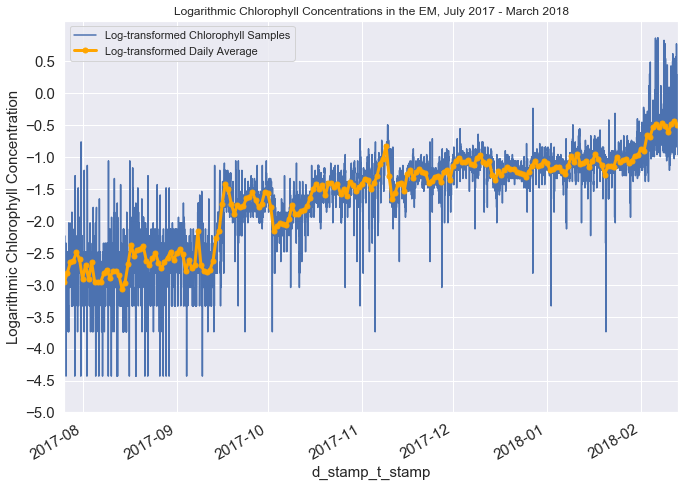

In [18]:
## Log transformation graph, includes February
logplot = log.plot(title="Logarithmic Chlorophyll Concentrations in the EM, July 2017 - March 2018", 
                       figsize=(11,8), fontsize=15)
logplot.set_xlabel("Date", fontsize=15), logplot.set_ylabel("Logarithmic Chlorophyll Concentration", fontsize=15)
logavg = log.resample('D').mean()
logavg.plot(linewidth=3, color='orange', marker='o', markersize=5)
logplot.legend(["Log-transformed Chlorophyll Samples", "Log-transformed Daily Average"])
plt.yticks(np.arange(-5, 1, 0.5))